## 문제 1

#### 1. 아래 adagrad 코드의 마지막 두 줄을 adagrad 수식과 연관지어 설명하시오. (2.5점)

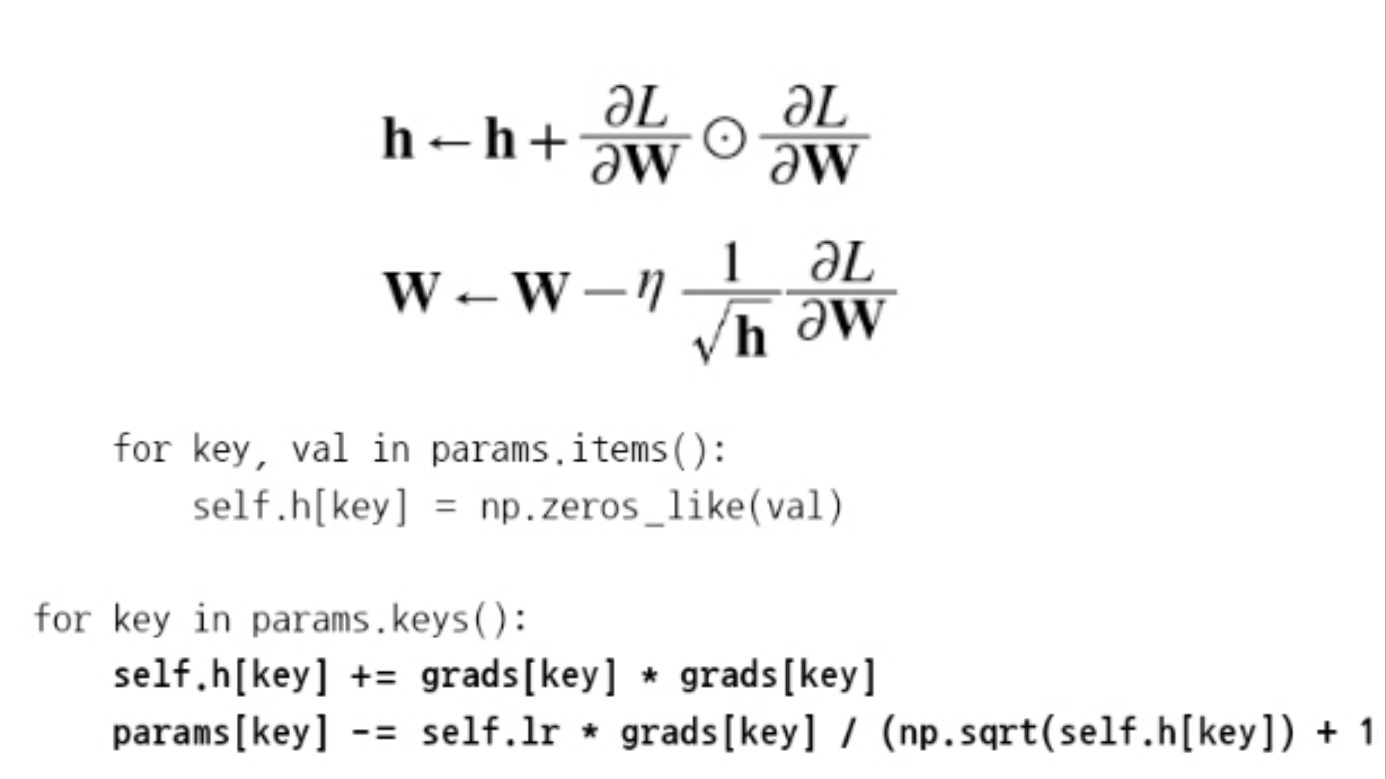

#### 1.정답

1)self.h[key] :가중치로 이전의 기울기값을 제곱하여 self.h에 누적한다.

2)grads[key] :grads는 가중치에 대한 기울기를 담고있다.(key에 해당하는 가중치의 기울기)

3)params[key] :params는 가중치들을 담고있다.(key에 해당하는 가중치)

4)self.lr :학습률

5)1e-7의 의미 :self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아준다.

6)첫번째 줄을 수식과 연관지어 해석 :첫번째 줄은 기존의 h가중치에 기울기 제곱을 더해 업데이트하는 과정이다.

7)두번째 줄을 수식과 연관지어 해석 : 두번째 줄은 기존의 W가중치에 -학습률*기울기*1/sqrt(h)를 곱해 업데이트하는 과정이다.

#### 2. 배치 정규화를 앞에 두는 경우(CNN_bf)와 뒤에 두는 경우(CNN_af)와 배치 정규화를 하지 않는 경우(CNN) 3가지에 대해 실행해보고 정확도를 비교해보시오.
##### nn.Sequential 안을 설정해주시면 됩니다. 각 연산은 아래 줄을 참고해서 작성해주세요.
##### - 연산 순서 Conv2d -> ELU (활성화 함수 일종) -> MaxPool2d / 정규 배치화를 순서에 알맞게 모델 명에 맞춰서 넣어주세요.
##### - Conv2d 연산 : layer1에서는 nn.Cov2d(1, 16, kernel_size = 3, padding = 1)
##### - Conv2d 연산 : layer2에서는 nn.Cov2d(16, 32, kernel_size = 3, padding = 1)
##### - ELU 연산 : layer1, 2에서 ELU()
##### - MaxPool2d : layer1, 2에서 MaxPool2d(2) (2.5점)

#### 아래 코드들은 웬만해서는 건들지 말고 쭉 실행해주세요

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pdb

In [2]:
# gpu되면 mac 유저는 'mps:0'로 window 유저는 'cuda:0'로 설정
# gpu 안되면 cpu로 설정
device = torch.device("cuda:0")

In [3]:
train_dataset = torchvision.datasets.MNIST('../3주차', download=True, train = True,
                                           transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.MNIST('../3주차', download=True, train = False,
                                           transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 107179584.91it/s]


Extracting ../3주차/MNIST/raw/train-images-idx3-ubyte.gz to ../3주차/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24531327.22it/s]


Extracting ../3주차/MNIST/raw/train-labels-idx1-ubyte.gz to ../3주차/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40487848.75it/s]


Extracting ../3주차/MNIST/raw/t10k-images-idx3-ubyte.gz to ../3주차/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2576484.82it/s]


Extracting ../3주차/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../3주차/MNIST/raw



In [17]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

#### 문제

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 16, kernel_size = 3, padding = 1),
                                    nn.ELU(),nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
                                     nn.ELU(),nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(32*7*7, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out

In [26]:
class CNN_bf(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.BatchNorm2d(1),nn.Conv2d(1, 16, kernel_size = 3, padding = 1),
                                    nn.ELU(),nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential( nn.BatchNorm2d(16),nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
                                     nn.ELU(),nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(32*7*7, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out

In [21]:
class CNN_af(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 16, kernel_size = 3, padding = 1),
                                    nn.ELU(),nn.MaxPool2d(2), nn.BatchNorm2d(16)
        )
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
                                     nn.ELU(),nn.MaxPool2d(2), nn.BatchNorm2d(32)
        )
        self.fc1 = nn.Linear(32*7*7, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out

#### model 선언을 돌리고자 하는 모델에 맞춰서 설정해주세요.

In [22]:
model = CNN().to(device)
model1 = CNN_bf().to(device)
model2 = CNN_af().to(device)
models=[model,model1,model2]

#### model의 기타 설정은 아래 그대로 사용해세요. (바꿔도 상관 없어요)

In [13]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

##### 아래 리스트 변수명 등을 자유롭게 변경하여 위의 배치 정규화 여부 모델에 따른 정확도 등을 확인해보세요.
##### (시각화 여부는 자유입니다.)

In [ ]:
from torch.autograd import Variable

epochs = 5
predictions_list = []
labels_list = []
num_epoch = 0
epoch_list = []
accuracy_list = []

for epoch in range(epochs):

    ave_loss = 0

    for batch, data in enumerate(train_loader):

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        train = Variable(inputs.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ave_loss += loss.item() / len(train_loader)
    num_epoch += 1

    total = 0
    correct = 0
    for tests, labels in test_loader:
        test, labels = tests.to(device), labels.to(device)
        labels_list.append(labels)
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

    accuracy = correct * 100 / total
    epoch_list.append(num_epoch)
    accuracy_list.append(accuracy)
    print("# epoch = {}, loss : {}, Accuracy: {}%".format(num_epoch, ave_loss, accuracy))

#### 3. 배치정규화가 활성화함수보다 앞에 있는 경우와 뒤에 있는 경우에 어떤 차이가 있을지 예상해주세요. (정답 없음) (2.5점)


배치정규화가 활성화함수보다 앞에 있는 경우:
입력 데이터를 정규화한 후, 활성화 함수를 적용하므로
정규화된 입력 데이터가 활성화 함수에 전달되어 활성화 함수의 입력 범위가 제한된다.
이로 인해 활성화 함수의 출력 범위도 제한된다.

배치 정규화가 활성화 함수보다 뒤에 있는 경우:
활성화 함수를 적용한 후, 배치 정규화를 수행한다.
활성화 함수를 먼저 적용하므로, 네트워크는 활성화 함수에 대한 민감성이 높아질 수 있다.


#### 4. 아래는 SGD와 모멘텀에 의한 최적화 갱신 경로를 각각 시각화한 그림입니다. 모멘텀에서 지그재그 움직임이 줄어드는 이유를 서술해주세요. (2.5점)

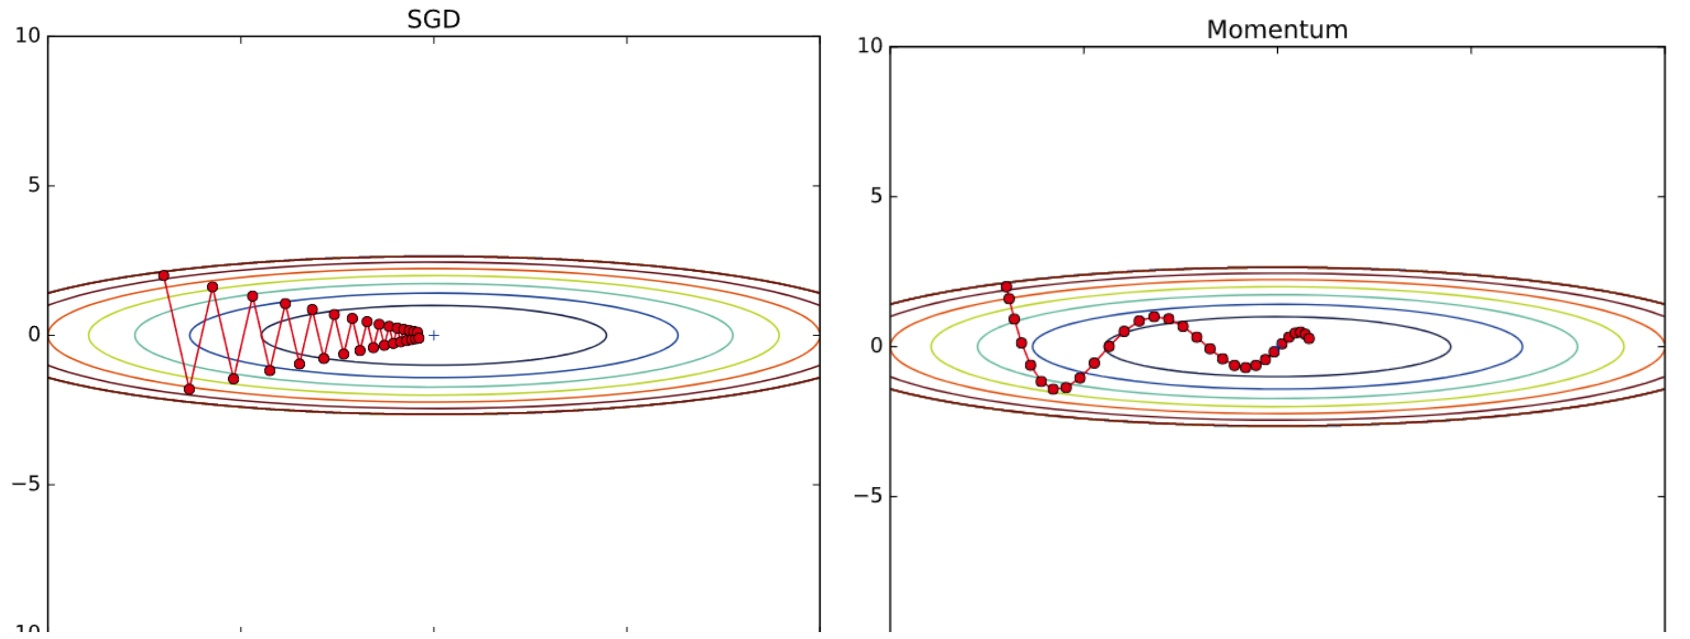

#### :x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다.

## 문제 2

Fashion-MNIST를 활용해 오차 역전파법을 적용한 신경망을 구현하려고 한다.

Fashion MNIST 데이터셋은  운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있다.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

1. train_loader와 test_loader에 각각 batch size = 64로 FashionMNIST를 저장하세요 (1점)

In [30]:
#데이터 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [35]:
train_dataset = torchvision.datasets.FashionMNIST(root='/data',train=True,transform=transform,download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='/data',train=False,transform=transform,download=True)

In [36]:
# train_loader
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64)
#test_loader
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64)

2. 모델을 정의합니다 Linear층 3개를 쌓고 ReLU함수를 사용하세요. 또한 flatten을 사용하여 1차원으로 만들어 주세요.  (hidden layer의 차원은 마음대로 설정해 주세요) (1점)

In [62]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return F.log_softmax(x, dim=1)


3. 위에서 사용한 활성화 함수인 ReLU의 특징을 서술하고, 순전파 때 입력이 x>0일때와 x<=0일 때 각각 역전파에서는 어떤 일이 발생하는지 서술하세요. (2점)

정답 감사합니다^^

정답 : ReLU는 비선형 함수로서 x>0일 때는 y=x, x가 0 이하일 때는 0의 값을 반환하는 활성화함수입니다. sigmoid와 tanh에 비해 연산 비용이 적어 속도가 빠르고, 0보다 작은 값들에서는 0이 반환되기 때문에 뉴런이 죽는다는 단점이 있습니다.

순전파 때 입력이 x>0이면 역전파에서는 상류의 값을 그대로 하류로 보내고(미분하면 1이기 때문에), x가 0이하일 때는 하류로 신호를 보내지 않습니다.


4. 모델 인스턴스화를 해주세요. (0.5점)

In [63]:
model = Net()

5. 손실 함수와 옵티마이저를 설정합니다. (손실함수는 CrossEntropyLoss, 옵티마이저는 Adam, learning rate = 0.01) (0.5점)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
losses = []                                              # 오차를 시각하하기 위한 리스트

6. 학습 함수를 정의합니다. 빈칸에 들어갈 코드를 작성하세요. (2점)

In [65]:
def train(model, train_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()                                # 이전 미니배치의 그레디언트 초기화
            output = model(data)
            loss = criterion(output, target)
            loss.backward()                                # 오차 역전파법을 통해 각 파라미터들에 대한 그래디언트를 계산
            optimizer.step()                                # 옵티마이저가 파라미터들을 업데이트한다.

            running_loss += loss.item()
            if batch_idx % 100 == 99:
                print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Loss: {running_loss / 100:.4f}')
                losses.append(running_loss / 100)       # 오차를 시각하하기 위해 losses에 append한다.
                running_loss = 0.0


7. 테스트 함수를 정의합니다. (1점)

In [66]:
#그대로 실행해 주세요
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

8. 이제 학습과 평가를 해보겠습니다. 원하는 에포크를 설정하여 학습해보고 결과를 출력하세요 (1점)

In [67]:
train(model, train_loader, criterion, optimizer, epochs=5)   # 에포크 채워넣기
test(model, test_loader)

Epoch 1, Batch 100, Loss: 1.3663
Epoch 1, Batch 200, Loss: 1.2256
Epoch 1, Batch 300, Loss: 1.1629
Epoch 1, Batch 400, Loss: 1.1374
Epoch 1, Batch 500, Loss: 1.1396
Epoch 1, Batch 600, Loss: 1.0616
Epoch 1, Batch 700, Loss: 0.9591
Epoch 1, Batch 800, Loss: 0.9228
Epoch 1, Batch 900, Loss: 0.8874
Epoch 2, Batch 100, Loss: 0.8820
Epoch 2, Batch 200, Loss: 0.8761
Epoch 2, Batch 300, Loss: 0.8650
Epoch 2, Batch 400, Loss: 0.8827
Epoch 2, Batch 500, Loss: 0.8660
Epoch 2, Batch 600, Loss: 0.8428
Epoch 2, Batch 700, Loss: 0.8336
Epoch 2, Batch 800, Loss: 0.8537
Epoch 2, Batch 900, Loss: 0.8529
Epoch 3, Batch 100, Loss: 0.8391
Epoch 3, Batch 200, Loss: 0.8554
Epoch 3, Batch 300, Loss: 0.8436
Epoch 3, Batch 400, Loss: 0.8416
Epoch 3, Batch 500, Loss: 0.8393
Epoch 3, Batch 600, Loss: 0.8415
Epoch 3, Batch 700, Loss: 0.8361
Epoch 3, Batch 800, Loss: 0.8373
Epoch 3, Batch 900, Loss: 0.8306
Epoch 4, Batch 100, Loss: 0.8401
Epoch 4, Batch 200, Loss: 0.8424
Epoch 4, Batch 300, Loss: 0.8371
Epoch 4, B

9. 학습이 진행됨에 따라 오차값이 어떻게 변화하는지 시각화하고, 그 결과를 설명해주세요 (1점)

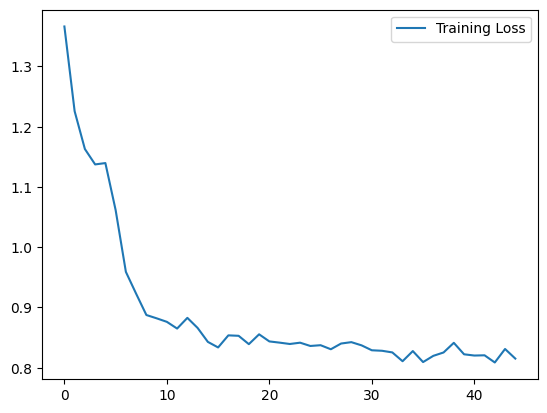

In [68]:
#실행해주세요
plt.plot(losses, label='Training Loss')
plt.legend()
plt.show()

정답: 오차역전법을 통해 학습을 할수록 오차는 줄어드는 경향을 보인다.